In [23]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.utils import to_categorical
import numpy as np
from sklearn.metrics import classification_report

In [24]:

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [25]:
y_cat_test = to_categorical(y_test, 10)
y_cat_train = to_categorical(y_train, 10)

In [26]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [27]:
x_train = x_train / 255.
x_test = x_test / 255.

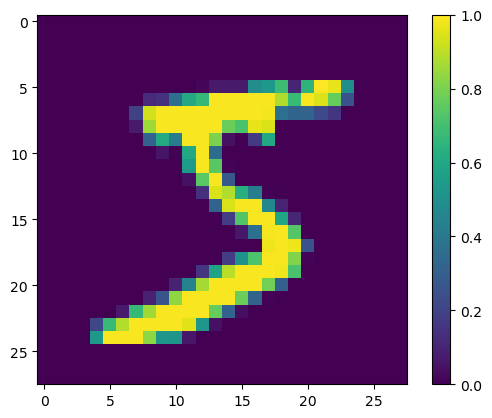

In [28]:
plt.imshow(x_train[0])
plt.colorbar()

In [29]:
x_train = x_train.reshape(*x_train.shape, 1)
x_test = x_test.reshape(*x_test.shape, 1)


In [30]:
model = Sequential()
model.add(Conv2D(filters=8, kernel_size=(4, 4), input_shape=(x_train.shape[1:]), activation="relu"))

model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(32, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])



In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 25, 25, 8)         136       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 8)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1152)              0         
                                                                 
 dense_2 (Dense)             (None, 32)                36896     
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 37,362
Trainable params: 37,362
Non-trainable params: 0
__________________________________________________

In [32]:
model.fit(x_train, y_cat_train, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 136s 72ms/step - loss: 0.2299 - accuracy: 0.9340
Epoch 2/2
1875/1875 [==============================] - 124s 66ms/step - loss: 0.0839 - accuracy: 0.9743


In [33]:
model.evaluate(x_test, y_cat_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0697 - accuracy: 0.9768


[0.06967721879482269, 0.9768000245094299]

In [34]:
predictions = model.predict(x_test)

313/313 [==============================] - 1s 4ms/step


In [35]:
np.round(predictions[0], 2)

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [36]:
y_cat_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [37]:
predictions = np.argmax(predictions, 1)

In [38]:
predictions[:5]

array([7, 2, 1, 0, 4])

In [39]:
plt.imshow(x_test[0, :, :, 0])

In [40]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.95      0.99      0.97      1032
           3       0.99      0.97      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.96      0.99      0.97       892
           6       0.99      0.98      0.98       958
           7       0.99      0.95      0.97      1028
           8       0.96      0.98      0.97       974
           9       0.99      0.95      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [44]:
model.save("my_model.h5")